In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
import os
for dirname, _, filenames in os.walk('D:/archive/CMaps'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/archive/CMaps\Damage Propagation Modeling.pdf
D:/archive/CMaps\readme.txt
D:/archive/CMaps\RUL_FD001.txt
D:/archive/CMaps\RUL_FD002.txt
D:/archive/CMaps\RUL_FD003.txt
D:/archive/CMaps\RUL_FD004.txt
D:/archive/CMaps\test_FD001.txt
D:/archive/CMaps\test_FD002.txt
D:/archive/CMaps\test_FD003.txt
D:/archive/CMaps\test_FD004.txt
D:/archive/CMaps\train_FD001.txt
D:/archive/CMaps\train_FD002.txt
D:/archive/CMaps\train_FD003.txt
D:/archive/CMaps\train_FD004.txt
D:/archive/CMaps\x.txt


In [3]:
train_data_no_name = pd.read_csv(r'D:/archive/CMaps/train_FD001.txt', sep = '\s+', header = None)
test_data_no_name = pd.read_csv(r'D:/archive/CMaps/test_FD001.txt', sep = '\s+', header = None)
true_rul_no_name = pd.read_csv(r'D:/archive/CMaps/RUL_FD001.txt', sep = '\s+', header = None)

In [4]:
'''This dataset has 26 columns (as well as the datasets for the other 3 scenarios). 
Because of Python's numbering convention, the columns are numbered from 0 to 25. Description of each column is as follows:

Column 1: Corresponds to engine number (This column is indexed 0 because of Python's numbering convention)
Column 2: Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will 
go from 1 to 192. Similarly for other engines.
Columns 3,4,5: 3 operational settings
Columns 6-26: 21 sensor measurements.
Hence, we will always refer to the first column as column 1 even though it is indexed as 0 in Python. 
Similarly for other columns.'''

"This dataset has 26 columns (as well as the datasets for the other 3 scenarios). \nBecause of Python's numbering convention, the columns are numbered from 0 to 25. Description of each column is as follows:\n\nColumn 1: Corresponds to engine number (This column is indexed 0 because of Python's numbering convention)\nColumn 2: Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will \ngo from 1 to 192. Similarly for other engines.\nColumns 3,4,5: 3 operational settings\nColumns 6-26: 21 sensor measurements.\nHence, we will always refer to the first column as column 1 even though it is indexed as 0 in Python. \nSimilarly for other columns."

In [5]:
# Naming the columns
# Let's add columns' names for better identification

columns = {0:'engineNumber', 1:'cycleNumber', 2:'opSetting1', 3:'opSetting2', 4:'opSetting3', 5:'sensor1', 6:'sensor2',
           7:'sensor3', 8:'sensor4', 9:'sensor5', 10:'sensor6', 11:'sensor7', 12:'sensor8', 13:'sensor9', 14:'sensor10',
           15:'sensor11', 16:'sensor12', 17:'sensor13', 18:'sensor14', 19:'sensor15', 20:'sensor16',
           21:'sensor17', 22:'sensor18', 23:'sensor19', 24:'sensor20', 25:'sensor21'}

train_data = train_data_no_name.rename(columns = columns)
test_data = test_data_no_name.rename(columns = columns)
true_rul = true_rul_no_name.rename(columns = {0: 'RUL'})

In [6]:
train_data.describe()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [7]:
true_rul.describe()

,RUL
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


In [8]:
train_data[train_data['engineNumber'] == 1]

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [9]:
# How many engines are there?
num_machines = np.unique(train_data['engineNumber']).shape[0]
num_machines

100

In [10]:
num_cycles_to_failure = train_data.groupby('engineNumber')['cycleNumber'].count()
num_cycles_to_failure[:10]

engineNumber
1     192
2     287
3     179
4     189
5     269
6     188
7     259
8     150
9     201
10    222
Name: cycleNumber, dtype: int64

In [11]:
# Last engine
num_cycles_to_failure[-1:]

engineNumber
100    200
Name: cycleNumber, dtype: int64

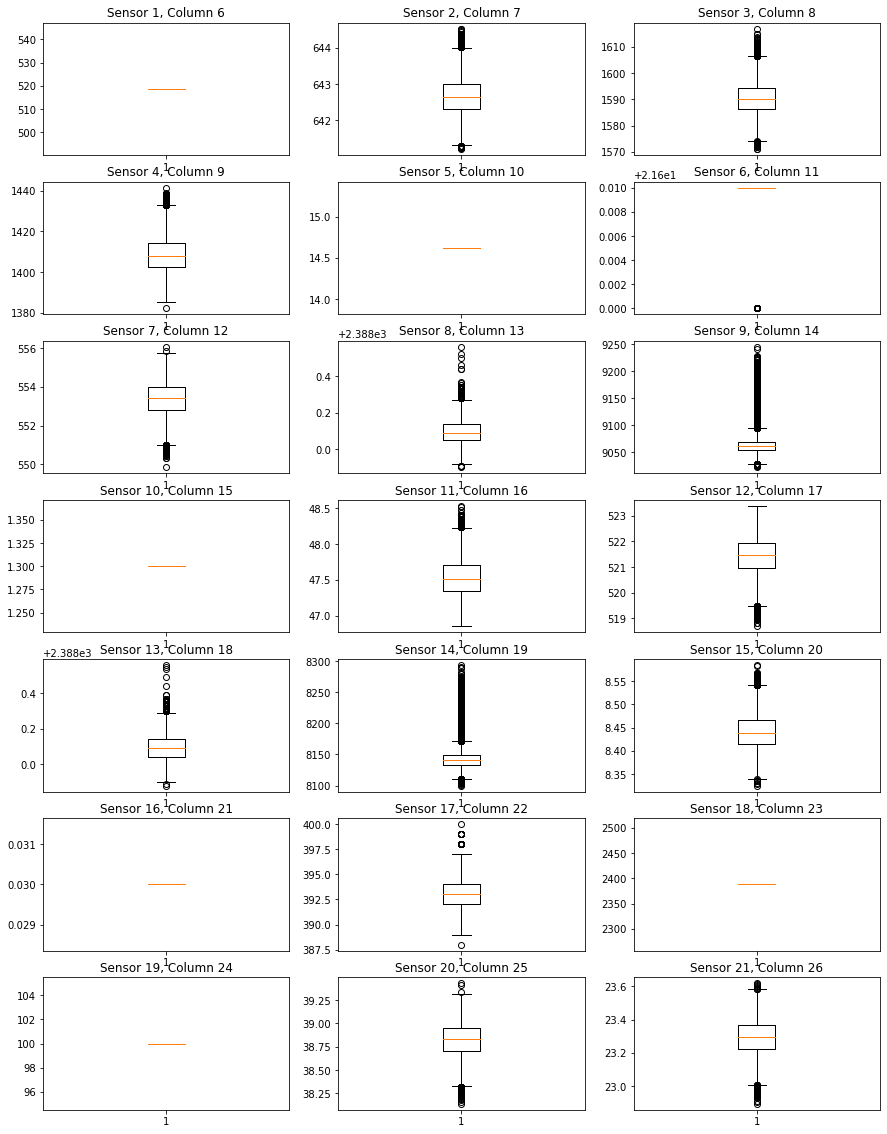

In [12]:
plt.figure(figsize = (15, 20))
for i in range(21):
    temp_data = train_data.iloc[:, i + 5]
    plt.subplot(7, 3, i+1)
    plt.boxplot(temp_data)
    plt.title("Sensor " + str(i+1) + ", Column " + str(i+6))
plt.show()

In [13]:
'''From the above plot we see that columns 6, 10, 11, 15, 21, 23 and 24 contain constant values

These columns corresponds to sensors 1, 5, 6, 10, 16, 18 and 19
Useful sensors are therefore 2, 3, 4, 7, 8, 9, 11, 12 ,13 ,14 ,15 ,17, 20, 21'''

'From the above plot we see that columns 6, 10, 11, 15, 21, 23 and 24 contain constant values\n\nThese columns corresponds to sensors 1, 5, 6, 10, 16, 18 and 19\nUseful sensors are therefore 2, 3, 4, 7, 8, 9, 11, 12 ,13 ,14 ,15 ,17, 20, 21'

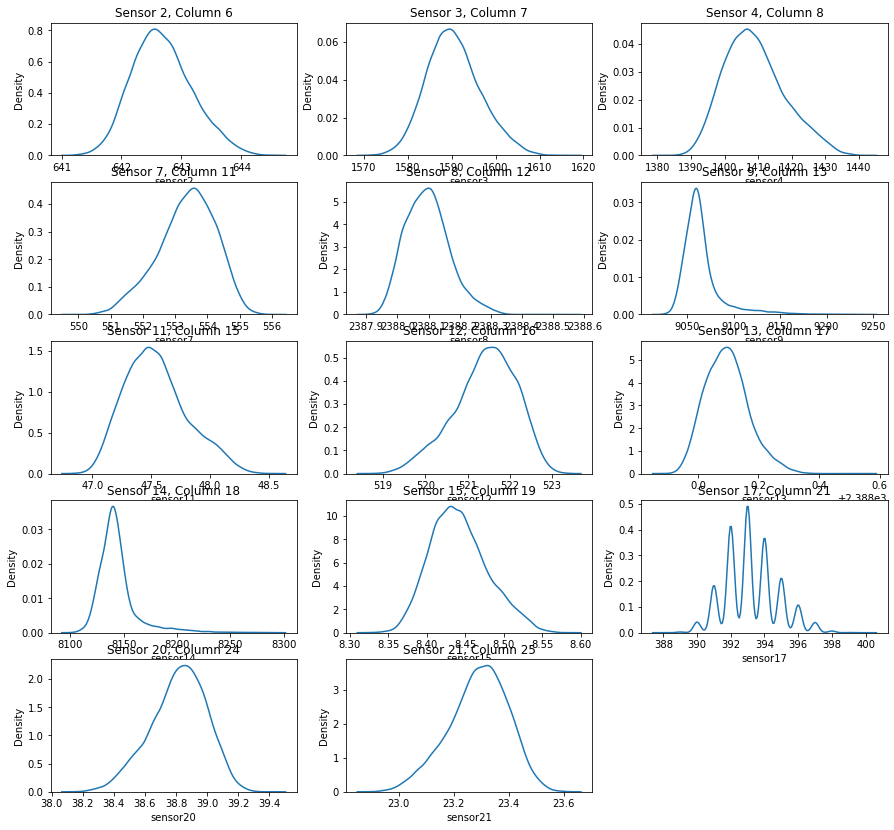

In [14]:
# Probability density distributions for the relevant sensors
plt.figure(figsize = (15, 20))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_data = train_data.iloc[:, j]
    plt.subplot(7, 3, i+1)
    sns.kdeplot(temp_data, legend = False)
    plt.title("Sensor " + str(j-4) + ", Column " + str(j))
plt.show()

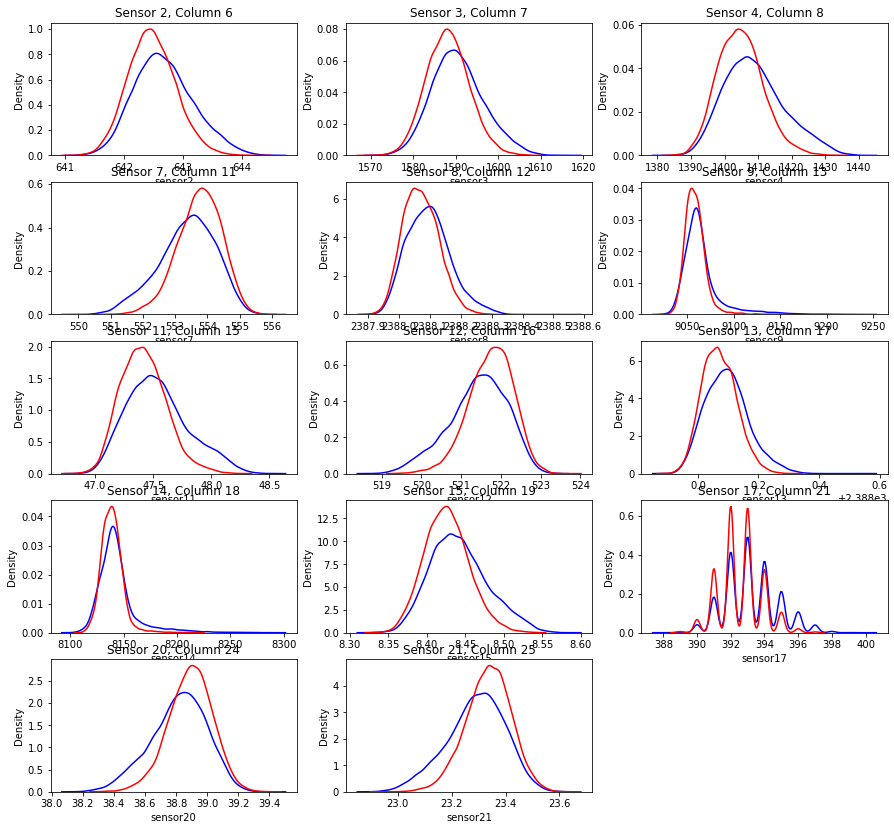

In [15]:
# Probability density distributions on training and testing data
plt.figure(figsize = (15, 20))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_train = train_data.iloc[:, j]
    temp_test = test_data.iloc[:, j]
    plt.subplot(7, 3, i+1)
    sns.kdeplot(temp_train, legend = False, label = 'Train', color = 'blue')
    sns.kdeplot(temp_test, legend = False, label  = 'test', color = 'red')
    plt.title("Sensor " + str(j-4) + ", Column " + str(j))
plt.show()

In [16]:
columns_to_keep = ['cycleNumber', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9',
                   'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
                   'sensor17', 'sensor20', 'sensor21']

columns_to_drop = ['opSetting1', 'opSetting2', 'opSetting3',
                   'sensor1','sensor5','sensor6','sensor10','sensor16','sensor18', 'sensor19']